## **Creating model**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [3]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **Creating training dataset**

In [4]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [5]:
train_labels = []
train_samples = []

In [6]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

## **Training model**

In [ ]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

## **Creating a test set**

In [10]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## **Evaluating a test set**

In [11]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [ ]:
for i in predictions:
    print(i)

In [13]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
for i in rounded_predictions:
    print(i)

## **Analyzing the confusion matrix**

In [15]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [16]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [19]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[193  17]
 [ 10 200]]


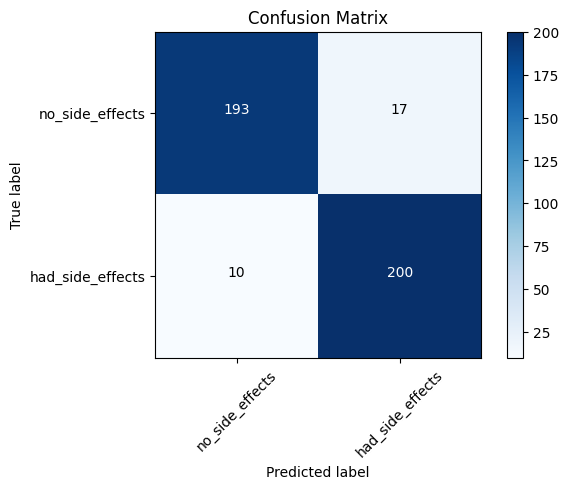

In [20]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## **1. model.save()**

In [21]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')

This function saves:
* The architecture of the model, allowing to re-create the model.
* The weights of the model.
* The training configuration (loss, optimizer)
* The state of the optimizer, allowinng to resume training exactly where you left.

In [22]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [23]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [25]:
new_model.get_weights()

[array([[ 0.7263143 , -0.37084234, -0.10190812, -0.04804528,  0.5230936 ,
         -0.17790899, -0.10899913, -0.00146729, -0.33397636, -0.05158991,
          0.3700958 , -0.51072645, -0.06927307, -0.27870095,  0.31439146,
         -0.5449897 ]], dtype=float32),
 array([-0.13094622,  0.        ,  0.        ,  0.        , -0.11730025,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.01620673,  0.        ,  0.22396775,  0.        , -0.09145606,
         0.        ], dtype=float32),
 array([[-3.72915149e-01, -1.08773515e-01, -2.35196948e-03,
         -3.28661799e-01,  1.69785231e-01,  7.43561313e-02,
          5.29788971e-01,  1.71600193e-01, -3.28006506e-01,
          5.74754477e-01, -2.34591037e-01, -1.39822856e-01,
          4.69404578e-01, -4.59190011e-02, -1.30873635e-01,
         -4.06730831e-01, -1.20450504e-01,  1.21390797e-01,
          5.48849642e-01,  4.72368628e-01, -1.84601381e-01,
         -1.73058361e-01, -3.22922409e-01, -2.86822498e-01,
 

In [26]:
new_model.optimizer

## **2. model.tojson()**

if you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [28]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [29]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [31]:
# model reconstruction from JSON
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tenserflow.keras.models import model_from_yaml
# model_architecture = model_from_yaml(yaml_string)

In [32]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## **3. model.save_weghts()**

In [33]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
  model.save_weights('models/my_model_weights.h5')

In [34]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [37]:
model2.load_weights('models/my_model_weights.h5')

## **Saving using joblib**

In [39]:
import joblib
# save model
joblib.dump(model, 'my_model.pkl')
 
# load model
loaded_model = joblib.load("my_model.pkl")

In [40]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
